# Exploratory Data Analysis - Titanic dataset

In this notebook, I will perform Exploratory Data Analysis (EDA) on the Titanic dataset, and handle missing values. The goal is to predict which passengers survived the Titanic's shipwreck. After this initial EDA, I will use different Machine Learning algorithms to predict survival on the Titanic.

#### Table of contents

[1. General exploration](#general) <br/>
[2. Feature analysis and engineering](#feature) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Ticket classes](#gender) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Sex or gender](#class) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Age](#age) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1. Missing values of "Age"](#missing-age)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Number of siblings and spouses, and number of parents and children aboard](#number-aboard) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.1. New features: siblings or spouses aboard, and parents or children aboard](#aboard) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.5. Fare](#fare) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.5.1. Missing value of "Fare"](#missing-fare) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.6. Cabin](#cabin) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.6.1. New feature: decks](#decks) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.6.2. Missing values of "Cabin" and "Deck"](#missing-cabin) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.7. Port of embarkation](#port) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.7.1. Missing values of "Embarked"](#missing-embarked) <br/>
[3. Saving the clean datasets](#save)

## 1. General exploration <a name='general'/>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('data/train.csv', index_col='PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('data/test.csv', index_col='PassengerId')
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_df.shape, test_df.shape)

(891, 11) (418, 10)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Note that there are columns with missing data in both the training and the testing datasets: the "Age" and "Cabin" columns. Also, the "Embarked" column has 2 missing values in the training dataset, and the "Fare" column has 1 missing value in the testing dataset. We'll handle these missing values below.

In [8]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


## 2. Feature analysis and engineering <a name='feature'/>

Let's explore the different features of the training dataset, and their relation to the survival rate.

### 2.1. Ticket classes <a name='class'/>

First, let's look at the frequency of the different ticket classes, and the frequency of survivals among each class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

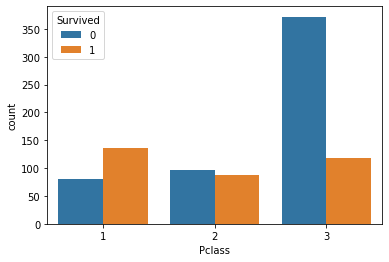

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

In [11]:
train_df.groupby("Pclass")['Survived'].agg([np.mean])

,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


We see that, the higher the class, the higher the proportion of survivals among the total passangers in that class. In the first class, the majority of passengers survived, while in the third class, the proportion of survivals is less than a quarter of the passengers. Thus, we can assume that the ticket class played an important role in the chances of survival of a passenger.

### 2.2. Sex or gender <a name='gender'/>

Let's now take a look at the "Sex" feature.

<AxesSubplot:xlabel='Sex', ylabel='count'>

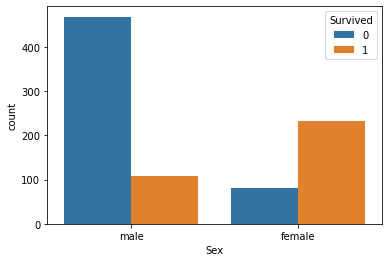

In [12]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

In [13]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
print('Proportion of male passengers over the total:',len(train_df[train_df['Sex']=='male'])/len(train_df))

Proportion of male passengers over the total: 0.6475869809203143


In [15]:
train_df.groupby("Sex")['Survived'].agg([np.mean])

,mean
Sex,
female,0.742038
male,0.188908


We observe that there was a majority of male passengers (considering only the training dataset, 64.76% were male passengers). When considering the rate of survival among male and female passengers, we see that the proportion of survivals among the female passengers is significantly higher than the one among the male passengers. This leads us to assume that the sex (or gender) of the passenger also played an important role in the chance of survival of that passenger.

### 2.3. Age <a name='age'/>

Let's now explore the relation between the age and the survival of a passenger.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

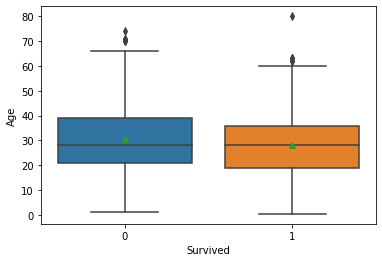

In [16]:
sns.boxplot(x='Survived', y='Age', data=train_df, showmeans=True)

The medians of the ages among the passengers who survived and the ones who did not, are identical. There is, however, a slight difference in the percentiles, and we note that the ones who did not survive tend to be older. However, we see that the age of the passenger is not as significant as other features when determining the chances of survival of that passenger.

In [17]:
print('Median of age among non-survivors:',train_df[train_df['Survived']==0]['Age'].median())
print('Median of age among survivors:',train_df[train_df['Survived']==1]['Age'].median())

Median of age among non-survivors: 28.0
Median of age among survivors: 28.0


#### 2.3.1. Missing values of "Age" <a name='missing-age'/>

Since the medians of the ages of the passengers who survived and the ones who did not are identical, it is adequate to handle the missing values of the "Age" feature by imputing them with the median age of the passengers. Note that we do not use the mean in this case, since the variance and the presence of outliers in both groups leads to a difference in the mean of the age among both groups. Though this difference may not be significant, in this particular case, using the median may be more accurate.

In [18]:
print('Mean of age among non-survivors:',train_df[train_df['Survived']==0]['Age'].mean())
print('Mean of age among survivors:',train_df[train_df['Survived']==1]['Age'].mean())

Mean of age among non-survivors: 30.62617924528302
Mean of age among survivors: 28.343689655172415


In [19]:
print('Median of age among survivors:',test_df['Age'].median())
print('Mean of age among survivors:',test_df['Age'].mean())

Median of age among survivors: 27.0
Mean of age among survivors: 30.272590361445783


In [20]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

### 2.4. Number of siblings and spouses aboard, and number of parents and children aboard <a name='number-aboard'/>

Let's now take a look at how the number of siblings and spouses, and the number of parents and children, influenced the chances of survival.

In [21]:
train_df['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [22]:
train_df['Parch'].value_counts().sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Taking into account that the unique values of "SibSp" and "Parch" are discrete, and there are few of them, it is adequate to use a count plot to explore both of these features.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

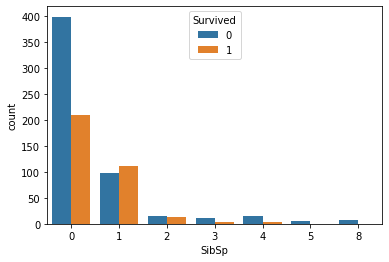

In [23]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)

In [24]:
train_df.groupby("SibSp")['Survived'].agg([np.mean])

,mean
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='Parch', ylabel='count'>

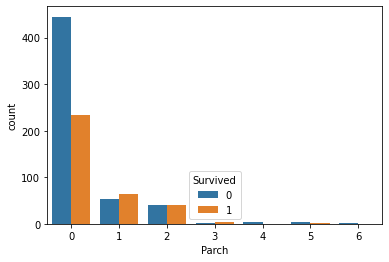

In [25]:
sns.countplot(x='Parch', hue='Survived', data=train_df)

In [26]:
train_df.groupby("Parch")['Survived'].agg([np.mean])

,mean
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


We see that there are few passengers who had five or more siblings or spouses aboard, and few passengers with 3 or more children or parents aboard. The scarcity of data among these groups could make the resulting proportion of survival unreliable. 

#### 2.4.1. New features: siblings or spouses aboard, and parents or children aboard <a name='aboard'/>

Considering the previous observation, I will take a different approach: I will create two boolean features: one that is set to 1 if the passenger had any siblings or spouses aboard and 0 otherwise, and the another that is set to 1 if the passenger had any parents or children aboard, and 0 otherwise. I will add these features to the testing dataset as well.

In [27]:
train_df['SibSpAboard'] = train_df['SibSp'].apply(lambda x: 1 if x>0 else 0)
test_df['SibSpAboard'] = test_df['SibSp'].apply(lambda x: 1 if x>0 else 0)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpAboard
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
train_df['ParChAboard'] = train_df['Parch'].apply(lambda x: 1 if x>0 else 0)
test_df['ParChAboard'] = test_df['Parch'].apply(lambda x: 1 if x>0 else 0)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpAboard,ParChAboard
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


Now let's explore the relation between having siblings, spouses, parents or children aboard and the chance of survival, using these new features.

<AxesSubplot:xlabel='ParChAboard', ylabel='count'>

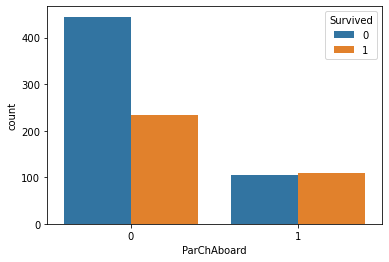

In [29]:
sns.countplot(x='ParChAboard', hue='Survived', data=train_df)

In [30]:
train_df.groupby("ParChAboard")['Survived'].agg([np.mean])

,mean
ParChAboard,
0,0.343658
1,0.511737


<AxesSubplot:xlabel='SibSpAboard', ylabel='count'>

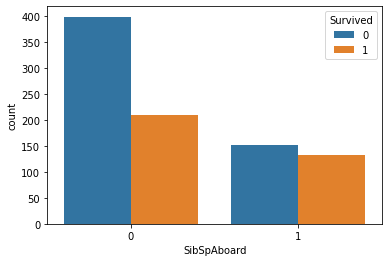

In [31]:
sns.countplot(x='SibSpAboard', hue='Survived', data=train_df)

In [32]:
train_df.groupby("SibSpAboard")['Survived'].agg([np.mean])

,mean
SibSpAboard,
0,0.345395
1,0.466431


We now can more clearly see that the passengers who had parents or children aboard had survived more frequently, and the same is true with the ones who had siblings or spouses aboard.

Let's see how these rates change if we consider the female and male passengers separately.

Text(0.5, 1.0, 'Male passengers')

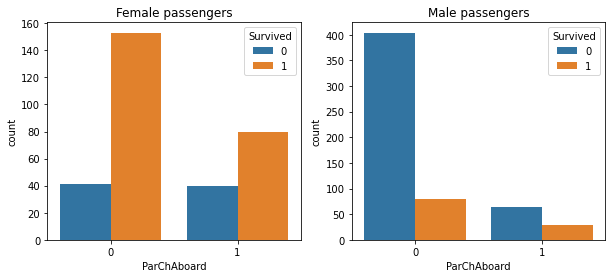

In [33]:
_, axes = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x='ParChAboard', hue='Survived', data=train_df[train_df['Sex']=='female'], ax=axes[0])
axes[0].set_title('Female passengers')
sns.countplot(x='ParChAboard', hue='Survived', data=train_df[train_df['Sex']=='male'], ax=axes[1])
axes[1].set_title('Male passengers')

In [34]:
train_df[train_df['Sex']=='female'].groupby("ParChAboard")['Survived'].agg([np.mean])

,mean
ParChAboard,
0,0.788660
1,0.666667


In [35]:
train_df[train_df['Sex']=='male'].groupby("ParChAboard")['Survived'].agg([np.mean])

,mean
ParChAboard,
0,0.165289
1,0.311828


Among the female passengers, the ones who had no children or parent aboard survived more frequently. The contrary happened among the male passengers.

Text(0.5, 1.0, 'Male passengers')

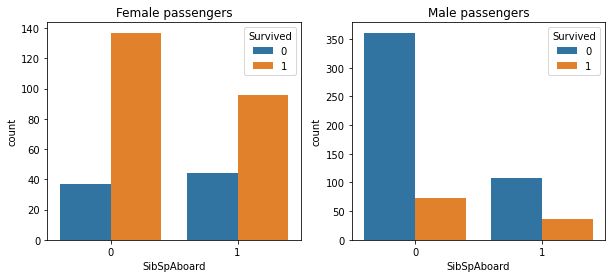

In [36]:
_, axes = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x='SibSpAboard', hue='Survived', data=train_df[train_df['Sex']=='female'], ax=axes[0])
axes[0].set_title('Female passengers')
sns.countplot(x='SibSpAboard', hue='Survived', data=train_df[train_df['Sex']=='male'], ax=axes[1])
axes[1].set_title('Male passengers')

In [37]:
train_df[train_df['Sex']=='female'].groupby("SibSpAboard")['Survived'].agg([np.mean])

,mean
SibSpAboard,
0,0.787356
1,0.685714


In [38]:
train_df[train_df['Sex']=='male'].groupby("SibSpAboard")['Survived'].agg([np.mean])

,mean
SibSpAboard,
0,0.168203
1,0.251748


Similarly to the case of parents and children, the female passengers who had no siblings or spouses aboard had a higher chance of survival, and the contrary happened among the male passengers: the ones with siblings or spouses aboard survived more frequently.

### 2.5. Fare <a name='fare'/>
Now, we will explore the "Fare" feature. It is intuitive to suppose that the "Fare" value is related to the ticket class.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

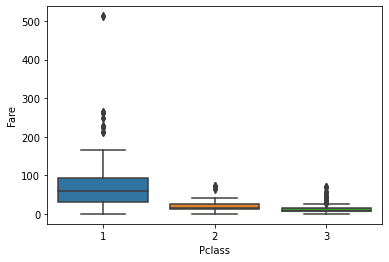

In [39]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

Let's remove the outliers from the boxplot to see the median and the percentiles more clearly.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

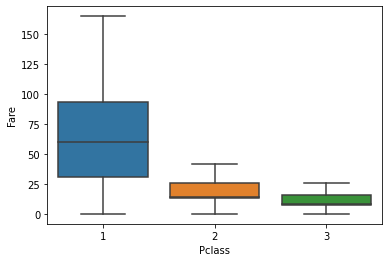

In [40]:
sns.boxplot(x='Pclass',y='Fare',data=train_df, showfliers=False)

The relation between the ticket class and the ticket price is noticeable, and thus we can expect to see an important relation between the "Fare" value and the survival rate, as we have seen previously with the ticket class.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

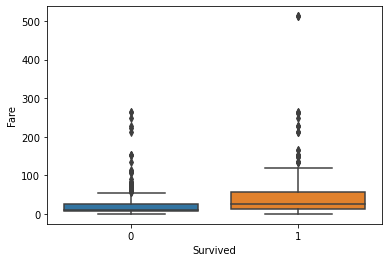

In [41]:
sns.boxplot(x='Survived',y='Fare',data=train_df)

Let's remove the outliers from the boxplot to see the median and the percentiles more clearly.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

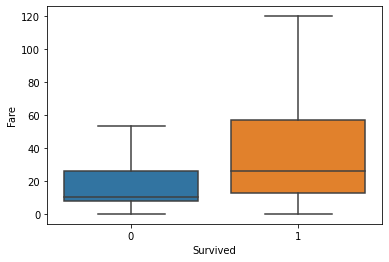

In [42]:
sns.boxplot(x='Survived',y='Fare',data=train_df, showfliers=False)

The higher the ticket price, the higher the chances of survival.

#### 2.5.1. Missing value of "Fare" <a name='missing-fare'/>
The "Fare" column has 1 missing value in the testing dataset. Let's see what values do the other features (in particular, the ticket class) have for those passengers

In [43]:
test_df[pd.isnull(test_df['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpAboard,ParChAboard
PassengerId,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0


<AxesSubplot:ylabel='Fare'>

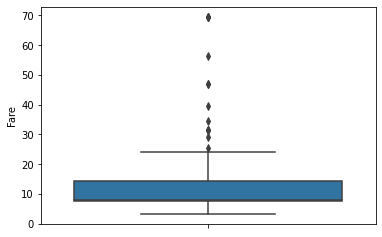

In [44]:
sns.boxplot(y='Fare',data=test_df[test_df['Pclass']==3])

<AxesSubplot:ylabel='Fare'>

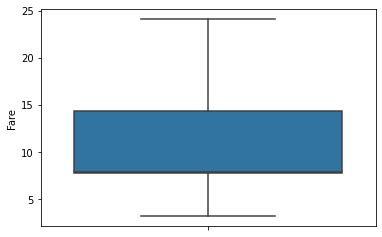

In [45]:
sns.boxplot(y='Fare',data=test_df[test_df['Pclass']==3], showfliers=False)

In [46]:
print('The median of the fares among the third class is:', test_df[test_df['Pclass']==3]['Fare'].median())
print('The mean of the fares among the third class is:', test_df[test_df['Pclass']==3]['Fare'].mean())

The median of the fares among the third class is: 7.8958
The mean of the fares among the third class is: 12.459677880184334


In this particular case, due to the presence of outliers which influence the mean ticket price among the Third class passengers, it is adequate to handle the missing value by replacing it with the median of the fares among this group.

In [47]:
test_df['Fare'].fillna(test_df[test_df['Pclass']==3]['Fare'].median(), inplace=True)

### 2.6. Cabin <a name='cabin'/>

Let's now see if the cabin number had any influence in the chance of survival.

In [48]:
train_df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
              ..
D49            1
C110           1
B71            1
B30            1
E38            1
Name: Cabin, Length: 147, dtype: int64

From a quick search on the Internet (in particular, the following articles from the Wikipedia: <a href='https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic'>First-class facilities of the Titanic</a> and <a href='https://en.wikipedia.org/wiki/Second-_and_third-class_facilities_on_the_Titanic#Accommodation'>Second- and third-class facilities on the Titanic</a>), I get the idea that the cabins (in particular, the letter that identifies each cabin, which stands for the deck where the cabin was located), was closely related to the ticket class. 

#### 2.6.1 New feature: decks <a name='decks'/>
I will verify the relation between decks and the ticket class by creating a new feature with the letter that identifies the cabin, and see if there is a correlation between this feature and the ticket class in our training and testing data.

In [49]:
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else np.nan)
test_df['Deck'] = test_df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else np.nan)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpAboard,ParChAboard,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,NaN


<AxesSubplot:xlabel='Deck', ylabel='count'>

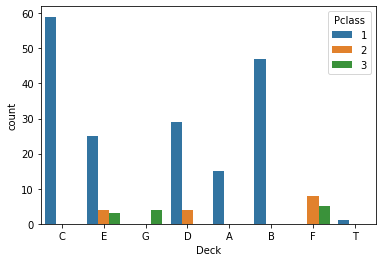

In [50]:
sns.countplot(x='Deck',hue='Pclass', data=train_df)

<AxesSubplot:xlabel='Deck', ylabel='count'>

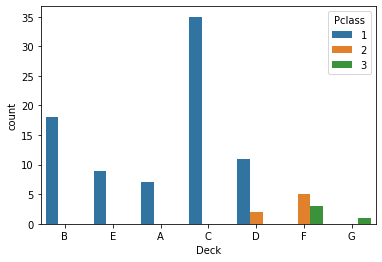

In [51]:
sns.countplot(x='Deck',hue='Pclass', data=test_df)

There is indeed a close relation between the ticket class and the deck. However, there are some decks which accommodated passengers from different classes.

Let's see if the deck had any influence on the rate of survival.

<AxesSubplot:xlabel='Deck', ylabel='count'>

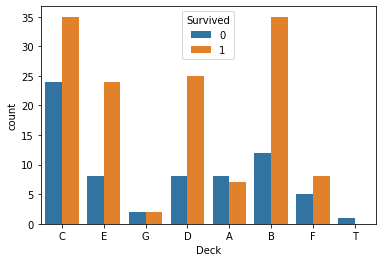

In [52]:
sns.countplot(x='Deck',hue='Survived', data=train_df)

In [53]:
train_df.groupby("Deck")['Survived'].agg([np.mean])

,mean
Deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


Note that almost all the proportions of passengers who survived are too high, considering that only 38.38% of the total passengers survived (seen at the beginning of this notebook). Let's see the proportion of survivals among the instances which have a missing value for the "Deck" feature.

In [54]:
train_df[pd.isnull(train_df['Deck'])]['Survived'].mean()

0.29985443959243085

The proportion of survivals among the instances with missing "Deck" is much lower. 

#### 2.6.2. Missing values of "Cabin" and "Deck" <a name='missing-cabin'/>

The lower proportion of survivals among instances with missing values for "Deck" leads to believe that there is more data available on the "Cabin" features (and therefore on the "Deck" feature) for the survivors. Thus, it can be considered that this feature can be strongly biased towards the survival cases, since it lacks information on the non-survival ones. Therefore, in this particular case, it would be an adequate decision to handle the missing values of the "Cabin" and the "Deck" features by dropping the features themselves. We will keep the features for this Exploratory Data Analysis, but in the end, when saving the clean datasets to use them for the Machine Learning algorithms, we will drop these and other useless features ("Name" and "Ticket").

### 2.7. Port of embarkation <a name='port'/>

To finish this exploration of the different features, let's take a look at how the port of embarkation influenced the rate of survival.

In [55]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

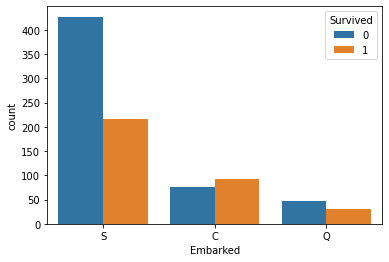

In [56]:
sns.countplot(x='Embarked',hue='Survived', data=train_df)

In [57]:
train_df.groupby("Embarked")['Survived'].agg([np.mean])

,mean
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Taking a look at the Wikipedia's article on the <a href="https://en.wikipedia.org/wiki/Titanic">Titanic</a>, I see that the first port that the first passengers boarded the Titanic at the port in Southampton, U.K. From the training dataset, we see that 72.44% of the passengers embarked at this port. Next, 18.90% of the passangers were picked up at Cherbourg, France. Finally, the rest of the passangers, an 8.66%, embarked in Queesntown, Ireland.

It is worth noticing (from the aforementioned source) that the majority of passengers who boarded the Titanic at the Cherbourg port were first class, which could have influenced the higher rate of survival among the passangers who embarked at this port. Also, the proportion of third class passangers boarded was the highest at Queenstown. Let's check that this fact is indeed true in our training and testing datasets.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

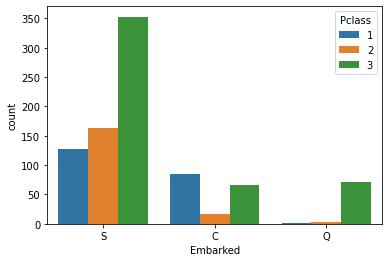

In [58]:
sns.countplot(x='Embarked',hue='Pclass', data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

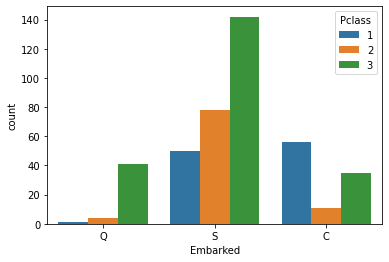

In [59]:
sns.countplot(x='Embarked',hue='Pclass', data=test_df)

In [60]:
# Proportion of first class passengers among those who boarded at the Cherbourg port.
proportion_train = len(train_df[(train_df['Embarked']=='C') & (train_df['Pclass'] == 1)]) / len(train_df[train_df['Embarked']=='C'])
proportion_test = len(test_df[(test_df['Embarked']=='C') & (test_df['Pclass'] == 1)]) / len(test_df[test_df['Embarked']=='C'])
print('Proportion in training dataset:',proportion_train)
print('Proportion in testing dataset:',proportion_test)

Proportion in training dataset: 0.5059523809523809
Proportion in testing dataset: 0.5490196078431373


#### 2.7.1. Missing values of "Embarked" <a name='missing-embarked'/>

The "Embarked" column has 2 missing values in the training dataset. Let's see what values do the other features (in particular, the ticket class) have for those passengers. Using this information, we will decide how to handle these missing values.

In [61]:
train_df[pd.isnull(train_df['Embarked'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpAboard,ParChAboard,Deck
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0,B
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0,B


In [62]:
train_df[(train_df['Deck']=='B') & (train_df['Pclass']==1)]['Embarked'].value_counts()

S    23
C    22
Name: Embarked, dtype: int64

The First class passengers located at deck B embarked either at Southampton or Cherbourg.

In this case, we will handle the missing values using the maximum frequency: since the majority of passengers were taken at Southampton, we will replace the missing values of "Embarked" by this port.

In [63]:
train_df['Embarked'].fillna('S', inplace=True)

## 3. Saving the clean datasets <a name='save'/>

In [64]:
# drop "Name", "Ticket", "Cabin" and "Deck" features (see section 2.6.2)
train_df.drop(columns=["Name", "Ticket", "Cabin","Deck"], inplace=True)
test_df.drop(columns=["Name", "Ticket", "Cabin","Deck"], inplace=True)

In [65]:
train_df.to_csv('data/clean_titanic_train.csv')
test_df.to_csv('data/clean_titanic_test.csv')